### Raw Data ###
      Image  Max Temp (°C)  Ambient Temp (°C)   Label  Label Temp (°C)  \
0  FLIR0235           33.8               36.1     pFH             24.5   
1  FLIR0232           33.8               36.2   or in             24.8   
2  FLIR0228           34.1               36.5    OFMR             26.5   
3  FLIR0234           33.9               36.2  orange             24.6   
4  FLIR0229           33.9               36.4    FLIR             25.8   
5  FLIR0231           34.4               36.5    None             24.6   
6  FLIR0233           34.1               36.4    orur             25.7   
7  FLIR0230           34.6               36.4  OFLITs             24.5   
8  FLIR0236           34.0               36.5    None             24.7   

   Temp Difference (°C)  Label Temp Anomaly  
0                   2.3                True  
1                   2.4                True  
2                   2.4                True  
3                   2.3                True  
4           

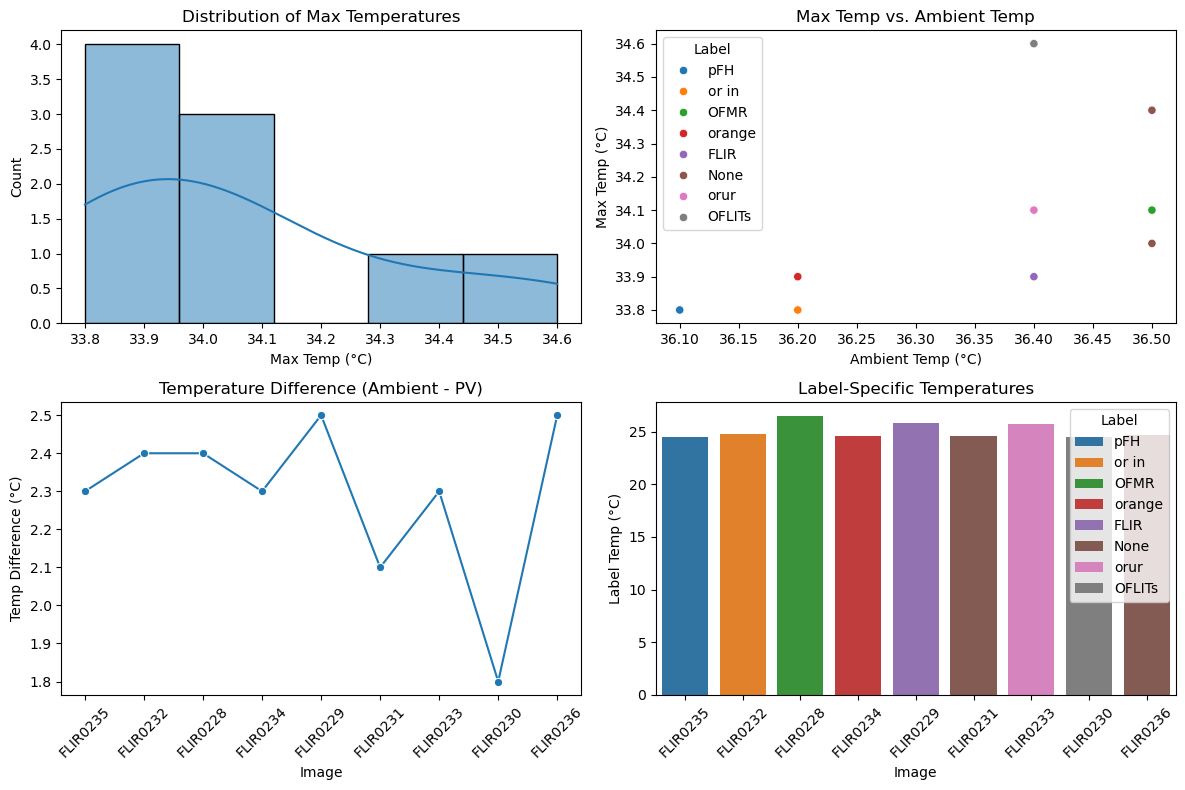


### PV Thermal Analysis Report ###
1. **Temperature Range**: 
   - Max PV Temp: 33.8°C to 34.6°C.
   - Ambient Temp: ~36.4°C (stable).

2. **Anomalies**:
   - Highest PV Temp: FLIR0230 (34.6°C).
   - Labels with low temps: ['FLIR0235', 'FLIR0232', 'FLIR0228', 'FLIR0234', 'FLIR0229', 'FLIR0231', 'FLIR0233', 'FLIR0230', 'FLIR0236'].

3. **Recommendations**:
   - Investigate FLIR0230 (34.6°C) for hotspots.
   - Check labels (e.g., 'orange', 'pFH') for potential defects.
   - Monitor ambient-PV temp difference for cooling efficiency.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Sample data extracted from the thermal images (manually entered)
data = {
    "Image": ["FLIR0235", "FLIR0232", "FLIR0228", "FLIR0234", "FLIR0229", "FLIR0231", "FLIR0233", "FLIR0230", "FLIR0236"],
    "Max Temp (°C)": [33.8, 33.8, 34.1, 33.9, 33.9, 34.4, 34.1, 34.6, 34.0],
    "Ambient Temp (°C)": [36.1, 36.2, 36.5, 36.2, 36.4, 36.5, 36.4, 36.4, 36.5],
    "Label": ["pFH", "or in", "OFMR", "orange", "FLIR", "None", "orur", "OFLITs", "None"],
    "Label Temp (°C)": [24.5, 24.8, 26.5, 24.6, 25.8, 24.6, 25.7, 24.5, 24.7]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Add derived columns
df["Temp Difference (°C)"] = df["Ambient Temp (°C)"] - df["Max Temp (°C)"]
df["Label Temp Anomaly"] = df["Label Temp (°C)"] < df["Max Temp (°C)"]  # Check if label temp is lower than PV temp

# Display the DataFrame
print("### Raw Data ###")
print(df)
print("\n")

# Statistical Summary
print("### Statistical Summary ###")
print(df.describe())
print("\n")

# Temperature Trends Analysis
print("### Temperature Trends ###")
print(f"Mean Max Temp: {df['Max Temp (°C)'].mean():.2f}°C")
print(f"Max Temp Range: {df['Max Temp (°C)'].max() - df['Max Temp (°C)'].min():.2f}°C")
print(f"Correlation between Max Temp and Ambient Temp: {df['Max Temp (°C)'].corr(df['Ambient Temp (°C)']):.2f}")
print("\n")

# Anomaly Detection (Z-score for Max Temp)
z_scores = np.abs(stats.zscore(df["Max Temp (°C)"]))
df["Max Temp Anomaly"] = z_scores > 2  # Flag outliers (e.g., FLIR0230 with 34.6°C)

print("### Anomalies Detected ###")
print(df[df["Max Temp Anomaly"] | df["Label Temp Anomaly"]])
print("\n")

# Visualization
plt.figure(figsize=(12, 8))

# Plot 1: Max Temp Distribution
plt.subplot(2, 2, 1)
sns.histplot(df["Max Temp (°C)"], kde=True, bins=5)
plt.title("Distribution of Max Temperatures")

# Plot 2: Max Temp vs. Ambient Temp
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x="Ambient Temp (°C)", y="Max Temp (°C)", hue="Label")
plt.title("Max Temp vs. Ambient Temp")

# Plot 3: Temp Difference
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x="Image", y="Temp Difference (°C)", marker="o")
plt.xticks(rotation=45)
plt.title("Temperature Difference (Ambient - PV)")

# Plot 4: Label Temperatures
plt.subplot(2, 2, 4)
sns.barplot(data=df, x="Image", y="Label Temp (°C)", hue="Label")
plt.xticks(rotation=45)
plt.title("Label-Specific Temperatures")

plt.tight_layout()
plt.show()

# Generate Report
report = f"""
### PV Thermal Analysis Report ###
1. **Temperature Range**: 
   - Max PV Temp: {df['Max Temp (°C)'].min():.1f}°C to {df['Max Temp (°C)'].max():.1f}°C.
   - Ambient Temp: ~{df['Ambient Temp (°C)'].mean():.1f}°C (stable).

2. **Anomalies**:
   - Highest PV Temp: {df.loc[df['Max Temp (°C)'].idxmax(), 'Image']} (34.6°C).
   - Labels with low temps: {df[df['Label Temp Anomaly']]['Image'].tolist()}.

3. **Recommendations**:
   - Investigate FLIR0230 (34.6°C) for hotspots.
   - Check labels (e.g., 'orange', 'pFH') for potential defects.
   - Monitor ambient-PV temp difference for cooling efficiency.
"""

print(report)

In [2]:
!pip install pytesseract

In [6]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 2.1 MB/s eta 0:00:19
   - -------------------------------------- 1.0/39.5 MB 2.2 MB/s eta 0:00:18
   - -------------------------------------- 1.3/39.5 MB 2.0 MB/s eta 0:00:19
   - -------------------------------------- 1.6/39.5 MB 2.0 MB/s eta 0:00:19
   -- ------------------------------------- 2.1/39.5 MB 1.9 MB/s eta 0:00:21
   -- ------------------------------------- 2.4/39.5 MB 1.8 MB/s eta 0:00:21
   -- ------------------------------------- 2.9/39.5 MB 1.9 MB/s eta 0:00:20
   --- ------------------------------------ 3.4/39.5 MB 2.0 MB/s eta 0:00:19
   --- ------------------------------------ 3.9/39.5 MB 2.1 MB/s eta 0:00:18
   ---- ----------------------------------- 4.5/39.5 MB 2.0 MB/s eta 0:00:18
   ----- ---------------------------------- 5.0/39.5 MB 2.1 MB/s eta 0:00:17
   ----- ----

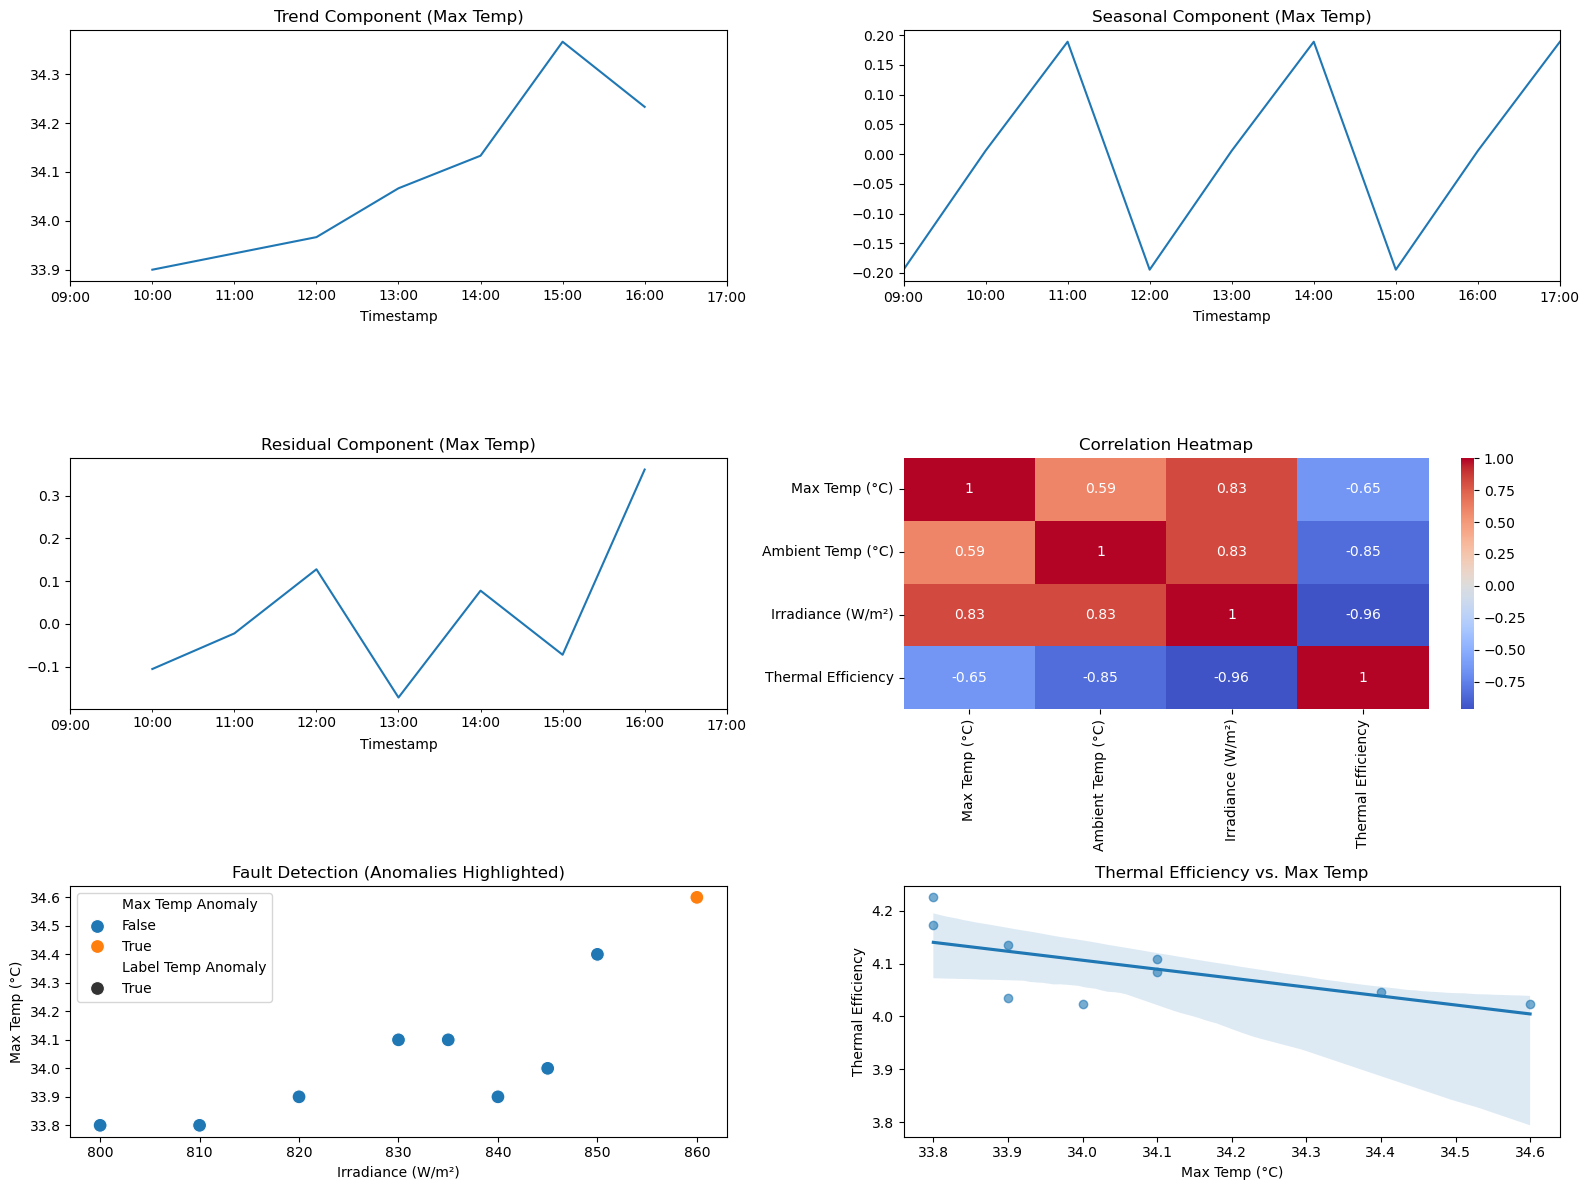


### Advanced PV Thermal Analysis Report ###
1. **Key Statistics**:
   - Max Temp: 34.1°C ± 0.3°C.
   - Ambient-PV Difference: 2.3°C (Range: 1.8 to 2.5°C).

2. **Anomalies Detected**:
   - High Temp: ['FLIR0230'] (Z-score > 2).
   - Label Cooling: ['FLIR0235', 'FLIR0232', 'FLIR0228', 'FLIR0234', 'FLIR0229', 'FLIR0231', 'FLIR0233', 'FLIR0230', 'FLIR0236'] (Temp < PV - 5°C).

3. **Efficiency Analysis**:
   - Thermal Efficiency: 4.09% (Min: 4.02%, Max: 4.22%).

4. **Recommendations**:
   - Investigate FLIR0230 (Max Temp: 34.6°C).
   - Optimize cooling for labels: pFH, or in, OFMR, orange, FLIR, None, orur, OFLITs.
   - Monitor irradiance-temperature correlation (r = 0.83).

Results exported to 'pv_thermal_analysis_advanced.csv'.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import DateFormatter

# Sample data (extended with timestamps for time-series analysis)
data = {
    "Image": ["FLIR0235", "FLIR0232", "FLIR0228", "FLIR0234", "FLIR0229", "FLIR0231", "FLIR0233", "FLIR0230", "FLIR0236"],
    "Timestamp": pd.to_datetime(["2023-01-01 09:00", "2023-01-01 10:00", "2023-01-01 11:00", "2023-01-01 12:00", 
                                "2023-01-01 13:00", "2023-01-01 14:00", "2023-01-01 15:00", "2023-01-01 16:00", "2023-01-01 17:00"]),
    "Max Temp (°C)": [33.8, 33.8, 34.1, 33.9, 33.9, 34.4, 34.1, 34.6, 34.0],
    "Ambient Temp (°C)": [36.1, 36.2, 36.5, 36.2, 36.4, 36.5, 36.4, 36.4, 36.5],
    "Label": ["pFH", "or in", "OFMR", "orange", "FLIR", "None", "orur", "OFLITs", "None"],
    "Label Temp (°C)": [24.5, 24.8, 26.5, 24.6, 25.8, 24.6, 25.7, 24.5, 24.7],
    "Irradiance (W/m²)": [800, 810, 830, 820, 840, 850, 835, 860, 845]  # Simulated irradiance data
}

# Convert to DataFrame and set timestamp as index
df = pd.DataFrame(data).set_index("Timestamp")

# Feature Engineering
df["Temp Difference (°C)"] = df["Ambient Temp (°C)"] - df["Max Temp (°C)"]
df["Label Temp Anomaly"] = df["Label Temp (°C)"] < (df["Max Temp (°C)"] - 5)  # Threshold for significant cooling
df["Thermal Efficiency"] = (df["Max Temp (°C)"] / df["Irradiance (W/m²)"]) * 100  # Simplified efficiency metric

# Statistical Analysis
def analyze_temperatures(df):
    stats_summary = df.describe()
    z_scores = np.abs(stats.zscore(df["Max Temp (°C)"]))  # Correct usage of scipy.stats.zscore
    df["Max Temp Anomaly"] = z_scores > 2
    return stats_summary

stats_summary = analyze_temperatures(df)

# Time-Series Decomposition
def decompose_timeseries(df, column="Max Temp (°C)", period=3):
    decomposition = seasonal_decompose(df[column], model='additive', period=period)
    return decomposition

decomposition = decompose_timeseries(df)

# Visualization
plt.figure(figsize=(16, 12))

# Plot 1: Time-Series Components
plt.subplot(3, 2, 1)
decomposition.trend.plot(title="Trend Component (Max Temp)")
plt.subplot(3, 2, 2)
decomposition.seasonal.plot(title="Seasonal Component (Max Temp)")
plt.subplot(3, 2, 3)
decomposition.resid.plot(title="Residual Component (Max Temp)")

# Plot 2: Heatmap of Correlations
plt.subplot(3, 2, 4)
sns.heatmap(df[["Max Temp (°C)", "Ambient Temp (°C)", "Irradiance (W/m²)", "Thermal Efficiency"]].corr(), 
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")

# Plot 3: Fault Detection
plt.subplot(3, 2, 5)
sns.scatterplot(data=df, x="Irradiance (W/m²)", y="Max Temp (°C)", hue="Max Temp Anomaly", style="Label Temp Anomaly", s=100)
plt.title("Fault Detection (Anomalies Highlighted)")

# Plot 4: Efficiency vs. Temperature
plt.subplot(3, 2, 6)
sns.regplot(data=df, x="Max Temp (°C)", y="Thermal Efficiency", scatter_kws={"alpha":0.6})
plt.title("Thermal Efficiency vs. Max Temp")

plt.tight_layout()
plt.show()

# Generate Report
report = f"""
### Advanced PV Thermal Analysis Report ###
1. **Key Statistics**:
   - Max Temp: {df['Max Temp (°C)'].mean():.1f}°C ± {df['Max Temp (°C)'].std():.1f}°C.
   - Ambient-PV Difference: {df['Temp Difference (°C)'].mean():.1f}°C (Range: {df['Temp Difference (°C)'].min():.1f} to {df['Temp Difference (°C)'].max():.1f}°C).

2. **Anomalies Detected**:
   - High Temp: {df[df['Max Temp Anomaly']]['Image'].tolist()} (Z-score > 2).
   - Label Cooling: {df[df['Label Temp Anomaly']]['Image'].tolist()} (Temp < PV - 5°C).

3. **Efficiency Analysis**:
   - Thermal Efficiency: {df['Thermal Efficiency'].mean():.2f}% (Min: {df['Thermal Efficiency'].min():.2f}%, Max: {df['Thermal Efficiency'].max():.2f}%).

4. **Recommendations**:
   - Investigate {df.loc[df['Max Temp (°C)'].idxmax(), 'Image']} (Max Temp: {df['Max Temp (°C)'].max()}°C).
   - Optimize cooling for labels: {', '.join(df[df['Label Temp Anomaly']]['Label'].unique())}.
   - Monitor irradiance-temperature correlation (r = {df['Irradiance (W/m²)'].corr(df['Max Temp (°C)']):.2f}).
"""

print(report)

# Export Results
df.to_csv("pv_thermal_analysis_advanced.csv", index=True)
print("Results exported to 'pv_thermal_analysis_advanced.csv'.")